<a href="https://colab.research.google.com/github/EstherSiatoya/ProyectoAnalisisdeDatos/blob/main/ProyectoAnalisisDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

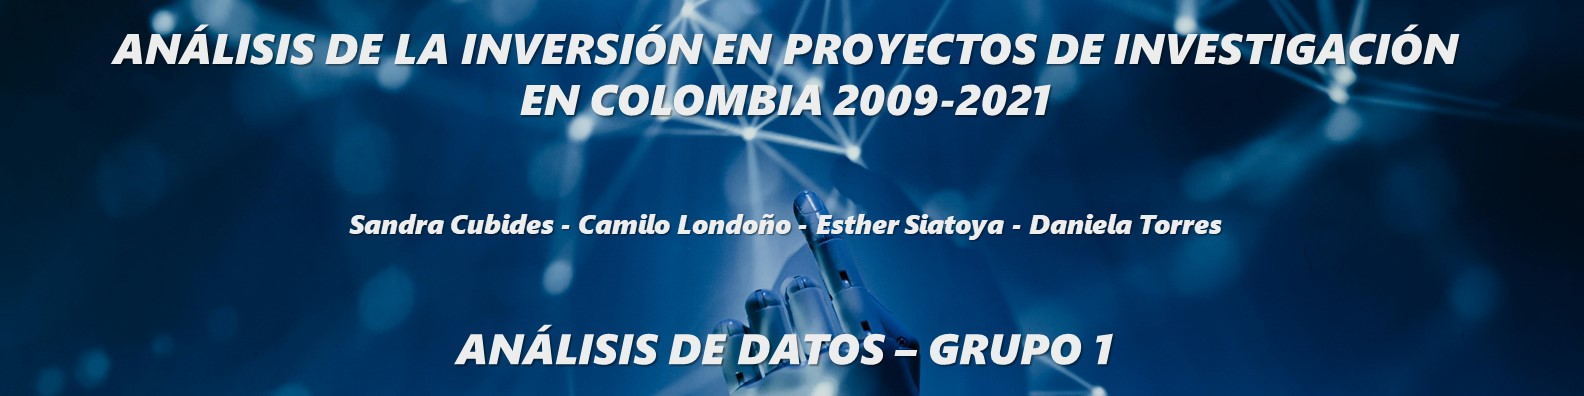

In [2]:
#Grupo 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/Proyecto_AD/Proyectos_Investigacion_Innovacion_evaluados_y_aprobados.csv')

url = 'https://raw.githubusercontent.com/EstherSiatoya/ProyectoAnalisisdeDatos/main/Proyectos_Investigacion_Innovacion_evaluados_y_aprobados.csv'
df = pd.read_csv(url)

df.info()
#df.describe() #sólo muestra los datos numéricos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3097 entries, 0 to 3096
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   PROYECTO_ID              3097 non-null   int64 
 1   CONVOCATORIA_ID          3097 non-null   int64 
 2   ANO_CONVOCATORIA         3097 non-null   int64 
 3   DESC_CONVOCATORIA        3097 non-null   object
 4   CODIGO_PROYECTO          3097 non-null   int64 
 5   TITULO_PROYECTO          3097 non-null   object
 6   FECHA_REGISTRO           3097 non-null   object
 7   FECHA_APROBACION         3097 non-null   object
 8   ENTIDAD_EJECUTA          3097 non-null   object
 9   TIPO_FINANCIACION        3097 non-null   object
 10  DESC_FINANCIACION        3097 non-null   object
 11  COD_PROG_CTI             3097 non-null   int64 
 12  NME_PROG_CTI             3097 non-null   object
 13  COD_AREA_TEMATICA        3097 non-null   object
 14  AREA_TEMATICA            3097 non-null  

In [41]:
df_convocatoria = df['ANO_CONVOCATORIA'].value_counts()
df_convocatoria.sort_index()

,count
ANO_CONVOCATORIA,
2007,1
2008,89
2009,272
2010,639
2011,97
2012,561
2013,92
2014,334
2015,255


In [44]:
df['NME_TIPO_PROYECTO'].value_counts()

,count
NME_TIPO_PROYECTO,
Proyecto,3058
Programa,39


**Panorama general**

*  Número de registros: 3097
*  Número de variables: 31
*  Dimensionalidad: 3097 x 31
*  Años de Convocatoria: 2007 - 2020
*  Tipo proyecto: Proyecto 3,058 y Programa 39
*  Tipos de datos: Enteros (int64) y Texto (object)
*  Fechas en texto: FECHA_REGISTRO, FECHA_APROBACION, no en formato datetime
*  Montos totales: 0 en 295 casos, probablemente falta de actualización o proyectos sin ejecución





In [3]:
#df.head() #Muestra las primeras filas o las que indique df.info()
df['MONTO_TOTAL_AP'].value_counts()

,count
MONTO_TOTAL_AP,
0,295
178873056,13
200000000,9
189062600,9
500000000,5
...,...
242700000,1
1317512000,1
1276644718,1


In [4]:
df['ENTIDAD_EJECUTA'].value_counts()

,count
ENTIDAD_EJECUTA,
UNIVERSIDAD DE ANTIOQUIA - UDEA,339
UNIVERSIDAD NACIONAL DE COLOMBIA - SEDE BOGOTA,270
UNIVERSIDAD DEL VALLE - UNIVALLE,130
UNIVERSIDAD DE ANTIOQUIA,104
UNIVERSIDAD NACIONAL DE COLOMBIA - SEDE MEDELLIN,90
...,...
CASALUKER S.A.,1
Bialtec S.A.S,1
ECOFLORA AGRO S.A.S,1


In [5]:
df['ENTIDAD_EJECUTA'].str.contains("UNIVERSIDAD").value_counts()

,count
ENTIDAD_EJECUTA,
True,2295
False,802


In [6]:
df.columns #Muestra todas las columnas

Index(['PROYECTO_ID', 'CONVOCATORIA_ID', 'ANO_CONVOCATORIA',
       'DESC_CONVOCATORIA', 'CODIGO_PROYECTO', 'TITULO_PROYECTO',
       'FECHA_REGISTRO', 'FECHA_APROBACION', 'ENTIDAD_EJECUTA',
       'TIPO_FINANCIACION', 'DESC_FINANCIACION', 'COD_PROG_CTI',
       'NME_PROG_CTI', 'COD_AREA_TEMATICA', 'AREA_TEMATICA',
       'COD_AREA_CIENCIA', 'NME_AREA_CIENCIA', 'ESTADO_PROYECTO',
       'COD_DANE_CIUDAD_ENTIDAD', 'NME_CIUDAD_ENTIDAD',
       'COD_DANE_DEPTO_ENTIDAD', 'NME_DEPTO_ENTIDAD', 'COD_DANE_CIUDAD_PRY',
       'NME_CIUDAD_PRY', 'COD_DANE_DEPTO_PRY', 'NME_DEPTO_PRY', 'TPO_PROYECTO',
       'NME_TIPO_PROYECTO', 'MONTO_FINANCIADO_AP', 'MONTO_CONTRAPARTIDA_AP',
       'MONTO_TOTAL_AP'],
      dtype='object')

In [29]:
df.isna().sum() #Muestra donde estan los datos NaN

,0
PROYECTO_ID,0
CONVOCATORIA_ID,0
ANO_CONVOCATORIA,0
DESC_CONVOCATORIA,0
CODIGO_PROYECTO,0
TITULO_PROYECTO,0
FECHA_REGISTRO,0
FECHA_APROBACION,0
ENTIDAD_EJECUTA,0
TIPO_FINANCIACION,0


In [8]:
df['FECHA_APROBACION'].value_counts()

,count
FECHA_APROBACION,
01/01/1900,183
15/12/2010,134
07/12/2010,107
09/10/2018,106
10/10/2017,94
...,...
29/08/2016,1
28/11/2016,1
22/12/2016,1


In [9]:
df['COD_AREA_CIENCIA'].value_counts()

,count
COD_AREA_CIENCIA,
X,2926
2,41
33,28
23,16
11,14
22,10
53,9
5,7
41,7


In [25]:
#df[(df.MONTO_FINANCIADO_AP == 0) & (df.MONTO_CONTRAPARTIDA_AP == 0) & (df.MONTO_TOTAL_AP == 0)]
df[(df.MONTO_TOTAL_AP == 0) & (df.FECHA_APROBACION == '01/01/1900')].loc[:,'FECHA_REGISTRO':'ENTIDAD_EJECUTA']
#58 registros que cumplen la condición

,FECHA_REGISTRO,FECHA_APROBACION,ENTIDAD_EJECUTA
647,30/04/2009,01/01/1900,UNIVERSIDAD CENTRAL
688,05/05/2009,01/01/1900,CENTRO DE INVESTIGACION Y DE ESTUDIOS SOBRE EL...
692,04/05/2009,01/01/1900,PONTIFICIA UNIVERSIDAD JAVERIANA - PUJ - SEDE ...
698,26/02/2009,01/01/1900,EDGAR ALONSO RIVERA ARDILA
709,10/02/2009,01/01/1900,CAMILO ARMANDO MOSCOSO MORENO
719,19/03/2009,01/01/1900,GOURMET CAFETERO WEB - MAGAZINE
728,24/03/2009,01/01/1900,G3 ADVISOFT LTDA
734,04/05/2009,01/01/1900,UNIVERSIDAD DE ANTIOQUIA - UDEA
742,18/02/2009,01/01/1900,JOHN SEBASTIAN OCAMPO MAZO
744,04/05/2009,01/01/1900,ASOCIACION COLOMBIANA RED ACADEMICA DE DISENO ...


In [28]:
df[(df.FECHA_APROBACION == '01/01/1900')].loc[:,'ANO_CONVOCATORIA':'ENTIDAD_EJECUTA']
#183 registros cumplen la condición

,ANO_CONVOCATORIA,DESC_CONVOCATORIA,CODIGO_PROYECTO,TITULO_PROYECTO,FECHA_REGISTRO,FECHA_APROBACION,ENTIDAD_EJECUTA
647,2009,489-2009 CONFORMACION DEL BANCO DE PROYECTOS D...,122548925282,Redes de Gestion de conocimiento en 10 grupos ...,30/04/2009,01/01/1900,UNIVERSIDAD CENTRAL
688,2009,489-2009 CONFORMACION DEL BANCO DE PROYECTOS D...,331848925438,Iniciacion a la Probabilidad,05/05/2009,01/01/1900,CENTRO DE INVESTIGACION Y DE ESTUDIOS SOBRE EL...
692,2009,489-2009 CONFORMACION DEL BANCO DE PROYECTOS D...,120348925416,CIBERCULTURAS JUVENILES Y CULTURA ACADEMICA ¿U...,04/05/2009,01/01/1900,PONTIFICIA UNIVERSIDAD JAVERIANA - PUJ - SEDE ...
698,2008,473/08 BANCO DE PROYECTOS PARA ASISTENCIA TEC...,540347325018,OOXCOMPANY LTDA,26/02/2009,01/01/1900,EDGAR ALONSO RIVERA ARDILA
709,2008,473/08 BANCO DE PROYECTOS PARA ASISTENCIA TEC...,914347322121,SEYFERTPlanta de tratamiento de materiales med...,10/02/2009,01/01/1900,CAMILO ARMANDO MOSCOSO MORENO
...,...,...,...,...,...,...,...
2740,2015,711-2015 CONVOCATORIA PARA PROYECTOS DE CIENCI...,126371150219,Analisis de la morbimortalidad en ninos menore...,14/07/2015,01/01/1900,UNIVERSIDAD MANUELA BELTRAN
2850,2015,710-2015 CONVOCATORIA PARA PROYECTOS DE INVE...,111071051620,Analisis de amenazas sismicas y de cambio clim...,28/07/2015,01/01/1900,UNIVERSIDAD TECNOLOGICA DE PEREIRA - UTP
2859,2015,710-2015 CONVOCATORIA PARA PROYECTOS DE INVE...,142371051684,Evaluacion y Modelacion de Procesos Erosivos e...,28/07/2015,01/01/1900,TECNOLOGICO DE ANTIOQUIA - TDEA
2878,2015,715 - 2015 CONVOCATORIA PARA PROYECTOS DE INVE...,111971551628,MODELAMIENTO DEL ESLABON DE ABASTECIMIENTO PAR...,28/07/2015,01/01/1900,UNIVERSIDAD NACIONAL DE COLOMBIA - SEDE MANIZALES
